# GRIP: The Sparks Foundation - Data Science & Business Analytics Internship

Author: Tanmay Bhuskute

## TASK 1 - Prediction using Supervised Machine Learning

In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

### Steps:

- Step 1 - Importing the python libraries & dataset
- Step 2 - Visualizing the dataset
- Step 3 - Data preparation
- Step 4 - Training the algorithm
- Step 5 - Visualizing the model
- Step 6 - Making predictions
- Step 7 - Evaluating the model

## STEP 1 - Importing the Libraries & Dataset

In this step, we will import python libraries required to execute the project and the dataset through the given link.

### Importing Libraries

In [1]:
# Importing All required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

### Importing Dataset

In [2]:
# Importing The Dataset
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
# Used the pandas library to read csv file
# And store the Dataset in a DataFrame

#Display The Head of DataFrame
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Dataset Information

In this we'll see what is the dataset about, how many features are there in dataset, what are the values of the features, etc

In [3]:
# Check How Many Rows And Columns Are There
df.shape

(25, 2)

In [4]:
df.describe()
# As we can see here, there are 25 rows of Hours and Scores each
# Mean Hours is 5 and Mean score is 51

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# To Show More Information About The The DataFrame
df.info()

# Conclusions :-
# 1. - > There are no null values.
# 2. - > Hours has float data type
# 3. - > Score has integer data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## STEP 2 - Visualizing the dataset

In this we will plot the dataset to check whether we can observe any relation between the two variables or not.

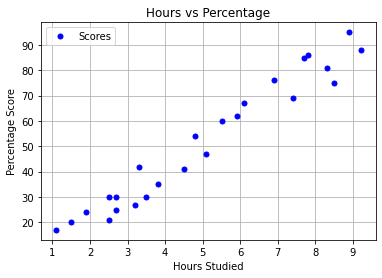

In [6]:
# Plotting The DataFrame

# Entering the input values to plot
df.plot(x = 'Hours', y = 'Scores', style = '.', color = 'blue', markersize = 10) 

# Title of the graph
plt.title('Hours vs Percentage')  
# X & Y Labels 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

# To display grid to the graph
plt.grid()
# To plot the graph
plt.show()

### Correlation

Using Correlation, we'll determine how much are the features related to each other.

In [7]:
# Display the Correlation between the features
dfCorr = df.corr()
dfCorr
# If the Correlation is positive that means when the hours increase, the scores increase too

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
# Correlation Between Hours and Scores
dfCorr.iloc[0,1]

0.9761906560220883

<AxesSubplot:>

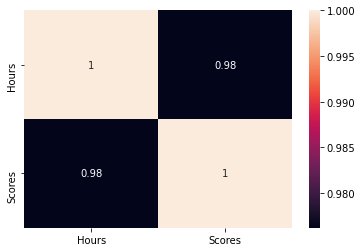

In [9]:
sns.heatmap(dfCorr, annot = True)

### Distplot

In this plot, we'll check if there are any outliers.

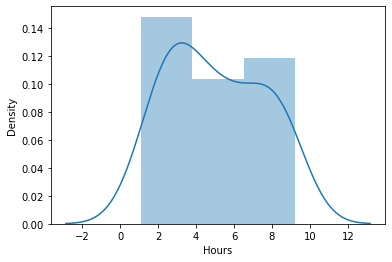

In [10]:
sns.distplot(df['Hours'])
plt.show()
# From this distplot we can see that there is no outlier in the data

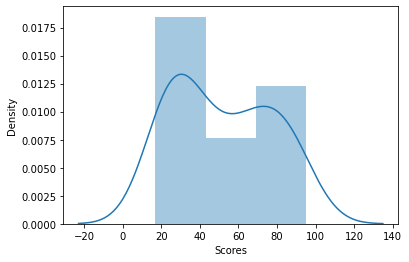

In [11]:
sns.distplot(df['Scores'])
plt.show()
# From this distplot we can see that there is no outlier in the data

### Pairplot

In this plot,  we'll check the relationship between Hours and Scores

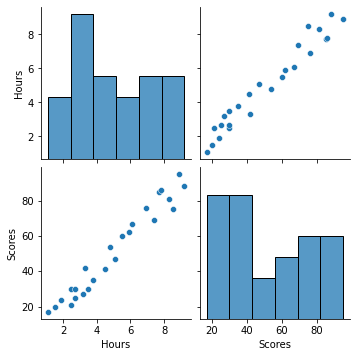

In [12]:
# Pairplot The Datafrane
sns.pairplot(data = df, kind = 'scatter')
# Plot pairwise relationships in a dataset
# In this case there are only two columns Hours and Scores

## STEP 3 - Data preparation

In this step we will divide the data into "features" (inputs) and "labels" (outputs). After that we will split the whole dataset into 2 parts - testing data and training data.

In [13]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
X = df[['Hours']]
y = df['Scores']

### Splitting Dataset into Two Parts

In [15]:
# Import train_test_split from sklearn Library
from sklearn.model_selection import train_test_split

# Input X_train, X_test, y_train, y_test from X & y using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## STEP 4 - Training the Algorithm

We have splitted our data into training and testing sets, and now we will train our Model.

In [16]:
# Import Linear Regression Library from sklearn
from sklearn.linear_model import LinearRegression

# Create Linear Regression Object
linReg = LinearRegression()

# Fit the X_train and y_train in the Linear Regression Object
linReg.fit(X_train, y_train)

print('Training is complete')

Training is complete


In [17]:
# Put the X_test in Linear Regression Predict Model to output y_predict
y_predict = linReg.predict(X_test)

print('y(Scores) predicted')

y(Scores) predicted


In [18]:
print('1. Coefficient    =',linReg.coef_[0])
print('2. Intercept      =',linReg.intercept_)
print('3. predictionLine = (Coefficient * X) + Intercept')

#            y = m(slope)     * X + c(y-intercept)
predictionLine = linReg.coef_ * X + linReg.intercept_

1. Coefficient    = 9.910656480642237
2. Intercept      = 2.018160041434683
3. predictionLine = (Coefficient * X) + Intercept


## STEP 5 - Visualizing the model

After training the model, now its time to visualize it.

### With Full Dataset

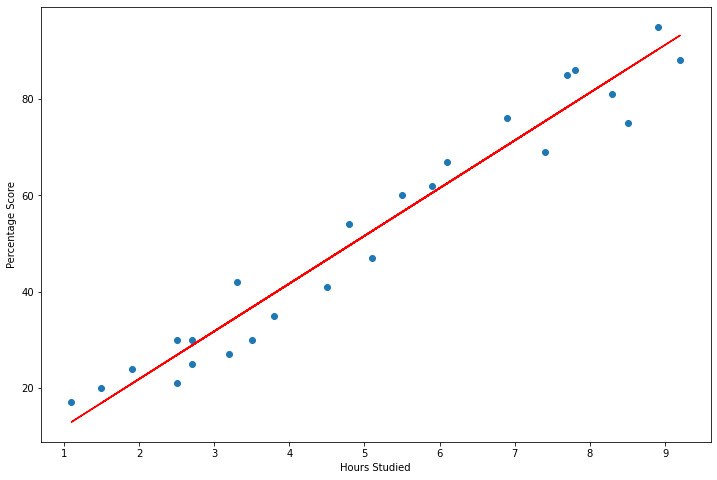

In [19]:
# Find a line in which the difference between 
# the predicted values on the line and actual values of points is minimum
# scikitlearn does min(sum(diff(pr, ac)))

# Graph Plot Size
plt.rcParams["figure.figsize"] = [12,8]

# Plotting the Linear Regression Line
plt.plot(X, predictionLine, color = 'r')

# Plot The Scatter Plot of Hours And Scores
plt.scatter(X,y)

# Setting the labels
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

# Show the Graph
plt.show()

### With Only Test Dataset

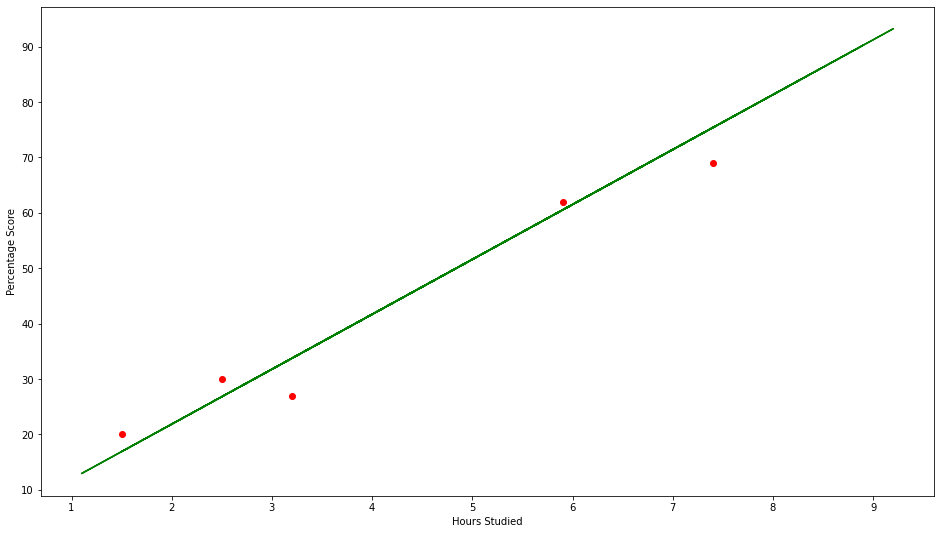

In [20]:
# Graph Plot Size
plt.rcParams["figure.figsize"] = [16,9]

# Plotting the Linear Regression Line
plt.plot(X, predictionLine, color='green');

# Plotting for the testing data
# Plot The Scatter Plot of Hours And Scores
plt.scatter(X_test, y_test, color='red')

# Setting the labels
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

# Show the Graph
plt.show()

## STEP 6 - Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

### X_test

In [21]:
print(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


### y_test

In [22]:
print(y_test)

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


### y_predict

In [23]:
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Comparing the actual and predicted value of y i.e. Scores

In [24]:
pd.DataFrame({'actual':y_test, 'predicted':y_predict}).reset_index(drop = True)

# without .reset_index() it was displaying y_test with its original index from DataFrame
# with .reset_index() it added a column to the left of the original indices which had indices from 0
# with .reset_index(drop = True) the original indices column was dropped

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


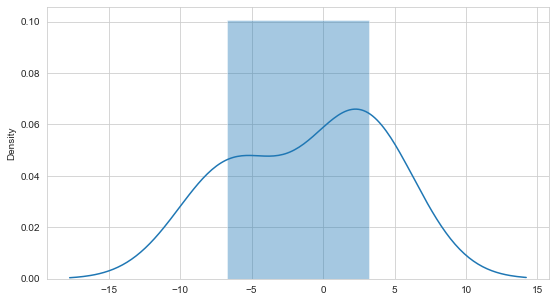

In [25]:
# Graph Plot Size
plt.rcParams["figure.figsize"] = [9,5]
sns.set_style('whitegrid')
# Show the error plot
sns.distplot(np.array(y_test - y_predict))
plt.show()

### Predicted Score for 9.25 Hrs

In [26]:
# Input Hours = 9.25

predictedScore = linReg.predict([[9.25]])
print("Hence, it can be concluded that the predicted score,") 
print("if a person studies for 9.25 hours is ", round(predictedScore[0],2))

Hence, it can be concluded that the predicted score,
if a person studies for 9.25 hours is  93.69


## STEP 7 - Evaluating the model

In the last step, we are going to evaluate our trained model by calculating 
1. Mean Squared Error
2. Root Mean Squared Error
3. Mean Absolute Error
4. R2 Score

In [27]:
# Finding out the mean squared error of y_pred from y_test 
# i.e. Difference in predicted score and actual test score

from sklearn import metrics
print('Mean Squared Error: \t\t',   round(        metrics.mean_squared_error (y_test, y_predict) ,2))
print('Root Mean Squared Error: \t',round(np.sqrt(metrics.mean_squared_error (y_test, y_predict)),2))
print('Mean Absolute Error: \t\t',  round(        metrics.mean_absolute_error(y_test, y_predict) ,2))
print('R2 Score: \t\t\t',           round(        metrics.r2_score           (y_test, y_predict) ,2))

Mean Squared Error: 		 21.6
Root Mean Squared Error: 	 4.65
Mean Absolute Error: 		 4.18
R2 Score: 			 0.95


# THANK YOU